In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

根据带噪声的线性模型构造数据集。使用线性模型参数w = [2, -3.4]<sup>T</sup>、b = 4.2和噪声项$\epsilon$生成数据集和标签

$$
y = Xw + b + \epsilon
$$

In [2]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声

    Args:
        w (_type_): _description_
        b (_type_): _description_
        num_examples (_type_): 取样本的数量
    """

    # 取均值为0方差为1的随机数，列数和w一致
    X = torch.normal(0, 1, (num_examples, len(w)))
    # y = Xw + b
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)

    return X, y.reshape((-1, 1))

In [21]:
# 生成样本
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

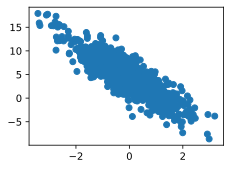

In [25]:
#展示
d2l.set_figsize()
d2l.plt.scatter(
    features[:, 1].detach().numpy(),
    labels.detach().numpy())